# **Partial Negation** 

------ 
<br>

#### A short introduction to the concept of partial negation by [Doha rizk](https://www.linkedin.com/in/doha-rizk/)

### Environment setup

In [0]:
# Installing Qiskit framework
!pip install qiskit --upgrade -q

     |████████████████████████████████| 2.9MB 3.4MB/s 
     |████████████████████████████████| 23.0MB 1.2MB/s 
     |████████████████████████████████| 143kB 55.8MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 1.8MB 21.4MB/s 
     |████████████████████████████████| 5.6MB 47.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 153kB 62.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 24.3MB 1.2MB/s 
     |████████████████████████████████| 573kB 57.0MB/s 
     |████████████████████████████████| 2.3MB 33.7MB/s 


In [0]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

### Theoretical analysis:

In quantum computing, gates are represented by a unitary matrix $U$, which transforms the state of a qubit to another. Some gates act on a single qubit such as the $PauliX$, $PauliY$ and $PauliZ$ gates which are rotations arround $x$, $y$ and $z$ axes with a certain angle recpectivally.

One of the gates that act on a single qubit is the $PauliX$ gate, which is equivelant to the classical NOT gate i.e. it inverts $\left| 0\right\rangle$ to $\left| 1\right\rangle$ and $\left| 1\right\rangle$ to $\left| 0\right\rangle$. The Unitary matrix of the $PauliX$ gate denoted as $\sigma_x$ can be represented as follows:

$\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}.$ 

A universal set of single qubit gates $R_x(\theta)$, $R_y(\theta)$ and $R_z(\theta)$ can be constructed by using infinite number of rotation angles arround $x$, $y$ and $z$ axes respectivally. Given that the Pauli gates are construted at a rotation angle $\theta=\pi$. 

The rotation matrix of the $PauliX$ gate with a rotation $\theta$ arround $x$-axis is expressed as follows:

$	R_x(\theta) =e^{-i \frac{\theta}{2}\sigma_x} =cos(\frac{\theta}{2})I- i\; sin(\frac{\theta}{2})\sigma_x,$

The $R_x(\theta)$ rotation matrix can be implemented using rx(), such that it takes two parameters, the first is the rotation angle and the second is the index of the qubit the rx gate will be applied on as shown below,

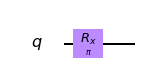

In [0]:
from qiskit import *
from math import *
q = QuantumCircuit(1)
q.rx(pi,0) #rotation angle pi on qubit 0
q.draw(output='mpl')

Other gates are designed to act on 2-qubit gates, such that there is a control qubit and a target qubit. When the control qubit is in state $\left| 1\right\rangle$, an arbitrary gate will be applied on the target qubit i.e. it could be $PauliX$, $PauliY$, $PauliZ$, $H$, and the rotation gates.

A controlled $R_x$ can be implemented using $CR_x$ gate. This gate takes three parameters, the first is the rotation angle, the second is the index of the control qubit and the third is the index of the target qubit.

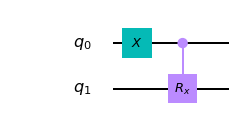

In [0]:
from qiskit import *
from math import *
q = QuantumCircuit(2)
q.x(0)#Applying an X-gate on qubit 0 to make it in state |1>, to enable the rx gate to be applied on qubit 1
q.crx(pi,0,1) #rotation angle pi on qubit 1
q.draw(output='mpl')

For a quantum register of $n$ qubits, a demonstration for a partial negation will be presented, such that an $R_x$ gate is applied conditionally on a $q_{n-1}$ qubit defined as the target qubit depending on the states of the control qubits $q_0,q_1,q_2,...,q_{n-2}$ i.e. if the state of a contol qubit $q_i$ is $\left| 1\right\rangle$, then $R_x$ will be applied on the target qubit $q_{n-1}$. The rotation angle of the $R_x$ will be $\theta=\pi/n$ where a full negation is applied if all controls where in state $\left| 1\right\rangle$, otherwise only a partial negation will be applied depending on the number of control qubits in state $\left| 1\right\rangle$ and the target qubit will be in a superposition, such that the result of measuring the target qubit could be $\left| 0\right\rangle$ or $\left| 1\right\rangle$ depending on the probability accompained by the states in the superposition. As the number of control qubits in state $\left| 1\right\rangle$ increase, the probability of negating the target qubit will increase and vice versa.


Applying the controlled $t^{th}$ root of $PauliX$ rotation gate for $d$-times where $d$ is the number of control qubits in state $\left| 1\right\rangle$, the probability of finding $q_{n-1}$ when measured in state $\left| 0\right\rangle$ or $\left| 1\right\rangle$ can be calculated as mentioned in this [paper](https://www.sciencedirect.com/science/article/abs/pii/S0003491617300817?via%3Dihub) as follows, <br><br> $Pr(\left|q_{n-1}\right\rangle=\left| 0\right\rangle)=cos(\frac{d\pi}{2t})^2$,<br>$Pr(\left|q_{n-1}\right\rangle=\left| 1\right\rangle)=sin(\frac{d\pi}{2t})^2$.

In the following example, a partial negation will be demonstrated on a 5-qubit register using a qasm simulator, such that 4 qubits are the controls i.e $t=4$ and 1 qubit initialized to the state $\left| 0\right\rangle$ is the target. The example below will show five cases, where at each case the number of control qubits in state $\left| 1\right\rangle$ will change and a measurement will be applied on the target qubit for 1024 times which is the dafault number of shots, then plot a histogram representing the probabilities of the outputs.

### Case 1: All control qubits are in state $\left| 0\right\rangle$

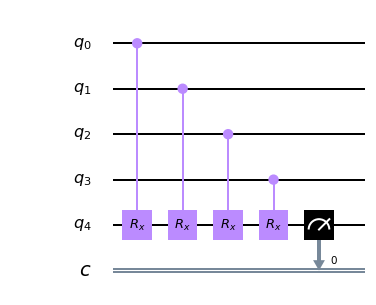

In [0]:
qc1=QuantumCircuit(5,1)
qc1.crx(pi/3,0,4)
qc1.crx(pi/3,1,4)
qc1.crx(pi/3,2,4)
qc1.crx(pi/3,3,4)
qc1.measure(4,0)
qc1.draw(output='mpl')

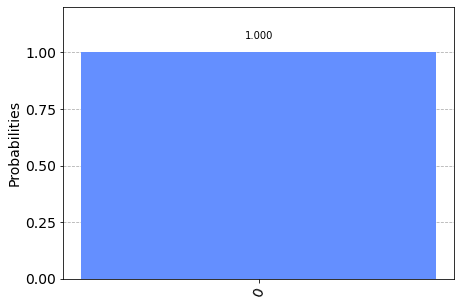

In [0]:
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
plot_histogram(execute(qc1,simulator,shots=1024).result().get_counts())

In this case, since all $4$ qubits are in state $\left| 0 \right\rangle$ i.e. $d=0$, $R_x$ is not applied on the target qubit, and hence the state of  $q_4$ will not change, and the output of measuring the qubit will always be $\left|   0 \right\rangle$ with certainty.

### Case 2: One control qubit in state $\left| 1\right\rangle$ and the others in state $\left| 0\right\rangle$

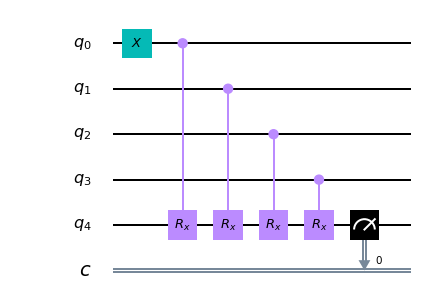

In [0]:
qc1=QuantumCircuit(5,1)
qc1.x(0)
qc1.crx(pi/4,0,4)
qc1.crx(pi/4,1,4)
qc1.crx(pi/4,2,4)
qc1.crx(pi/4,3,4)
qc1.measure(4,0)
qc1.draw(output='mpl')

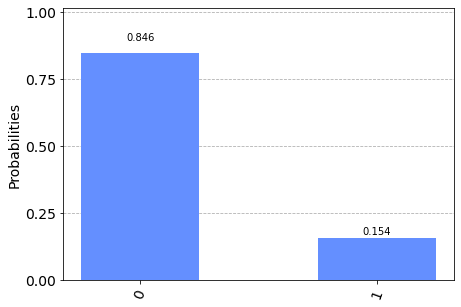

In [0]:
simulator = Aer.get_backend('qasm_simulator')
plot_histogram(execute(qc1,simulator,shots=1024).result().get_counts())

In this case, since one of the controls is in state $\left| 1\right\rangle$ i.e. $d=1$, $R_x$ will be applied only once for each iteration, and hence the target qubit will be in superposition, with a probability $\approx$ 85% to be in state $\left| 0\right\rangle$ and $\approx$ 15% in state $\left| 1\right\rangle$.

### Case 3: Two control qubits in state $\left| 1\right\rangle$ and two in state $\left| 0\right\rangle$

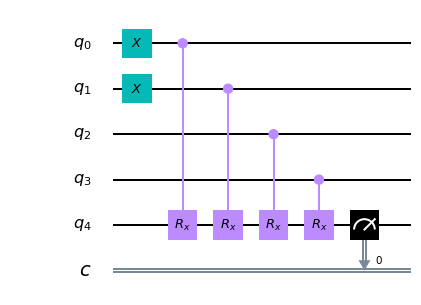

In [0]:
qc1=QuantumCircuit(5,1)
qc1.x(0)
qc1.x(1)
qc1.crx(pi/4,0,4)
qc1.crx(pi/4,1,4)
qc1.crx(pi/4,2,4)
qc1.crx(pi/4,3,4)
qc1.measure(4,0)
qc1.draw(output='mpl')

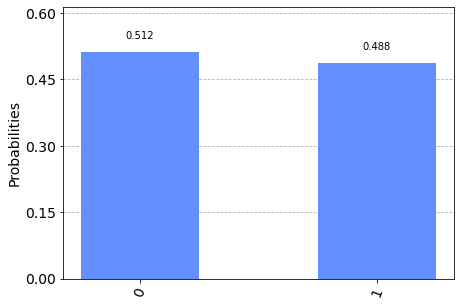

In [0]:
plot_histogram(execute(qc1,simulator,shots=1024).result().get_counts())

In this case, since two controls are in state $\left| 1\right\rangle$ and the other two in state $\left| 0\right\rangle$ i.e. $d=2$, then $R_x$ is applied twice on the target qubit per iteration, and hence the target qubit will be in a superposition with a probability 50% to be in state $\left| 0\right\rangle$ and 50% in state $\left| 1\right\rangle$.

### case 4: Three controls in state |1> and one control in state |0>

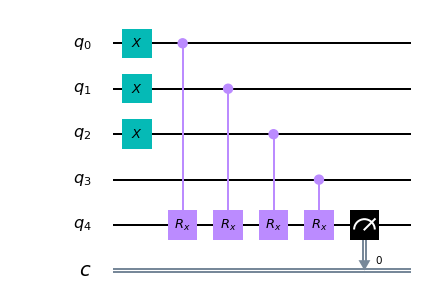

In [0]:
qc1=QuantumCircuit(5,1)
qc1.x(0)
qc1.x(1)
qc1.x(2)
qc1.crx(pi/4,0,4)
qc1.crx(pi/4,1,4)
qc1.crx(pi/4,2,4)
qc1.crx(pi/4,3,4)
qc1.measure(4,0)
qc1.draw(output='mpl')

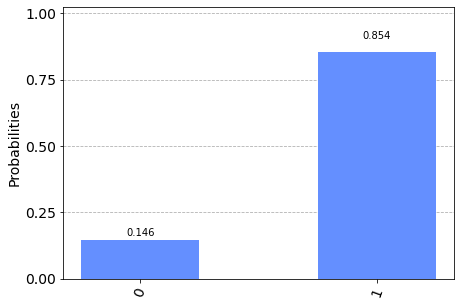

In [0]:
plot_histogram(execute(qc1,simulator,shots=1024).result().get_counts())

In this case since three controls are in state $\left| 1\right\rangle$ i.e. $d=3$, then rx will be applied three times in each iteration, and hence the target qubit will be in superposition, with a probability 85% to be in state $\left| 1\right\rangle$ and $\approx$ 15% in state $\left| 0\right\rangle$, since the number of times rx is applied to the target qubit is greater than the number of times it is not applied.

### Case 5: All control qubits in state $\left| 1\right\rangle$

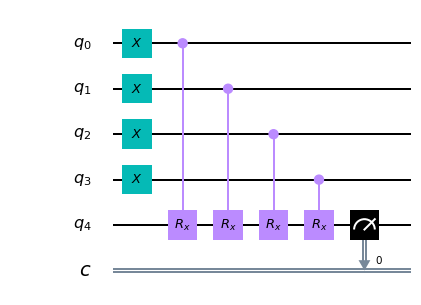

In [0]:
qc1=QuantumCircuit(5,1)
qc1.x(0)
qc1.x(1)
qc1.x(2)
qc1.x(3)
qc1.crx(pi/4,0,4)
qc1.crx(pi/4,1,4)
qc1.crx(pi/4,2,4)
qc1.crx(pi/4,3,4)
qc1.measure(4,0)
qc1.draw(output='mpl')

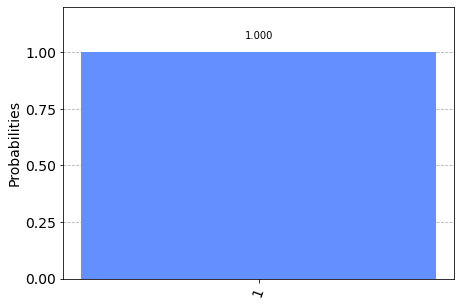

In [0]:
plot_histogram(execute(qc1,simulator,shots=1024).result().get_counts())

In this case, since all $4$ qubits are in state $\left| 1\right\rangle$ i.e. $d=4$, then $R_x$ is applied on the target qubit 4-times which is equal to the number of contol qubits, and hence a full negation will be applied on the target qubit leading $q_4$ to be in state $\left| 1\right\rangle$ with certainty.